# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#Checking Dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


This is our dataset on which we would do different operations. 

Let's check the features present in our data and then we will look at their data types.

In [4]:
#Droping unnecessary columns
df=df.drop(['customerID','gender'],axis=1)

In [5]:
#Checking Shape of Dataframe
df.shape

(7043, 19)

We have 18 independent variables and 1 target variable. Next, let's look at how many categorical and numerical variables are there in our dataset. 

In [6]:
#Checking Datatypes of columns of Dataframe
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Checking different values total counts in the columns:

In [7]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [8]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [9]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [10]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [11]:
#Changing datatype of TotalCharges from object to numeric type
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [12]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values present in TotalCharges column.

In [13]:
#Replacing Null value with 0.
df['TotalCharges']=df['TotalCharges'].replace(np.nan,0)

In [14]:
#Checking Nullvalues in the Dataframe
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

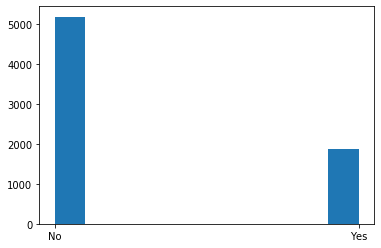

In [15]:
#Histogram Plot / Univariate Analysis
plt.hist(df['Churn'])
plt.show()

We can see that churn customers are less than existing customers.

<BarContainer object of 7043 artists>

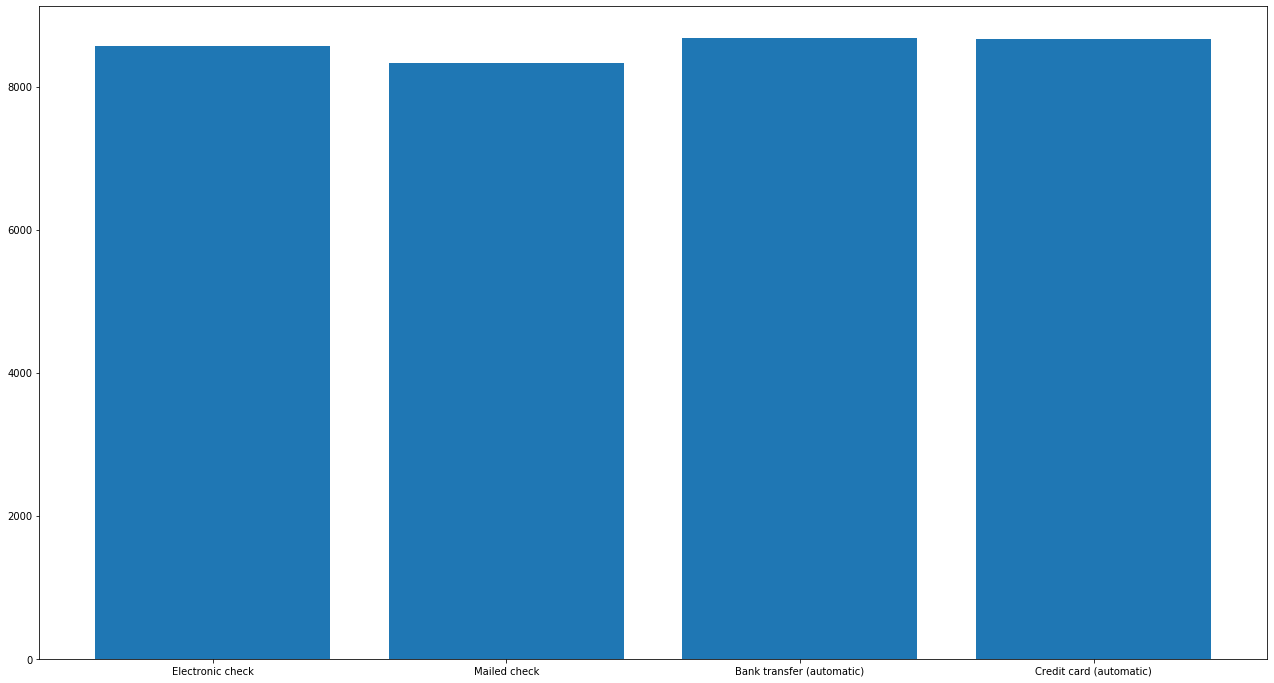

In [16]:
#Bar graph / Bivariate Analysis
plt.figure(figsize=[22,12])
plt.bar(df['PaymentMethod'],df['TotalCharges'])

From above plot we can observe that Mailed Check payment method has the lowest TotalCharges paid. And other three payment methods have approximately same TotalCharges paid.

<BarContainer object of 7043 artists>

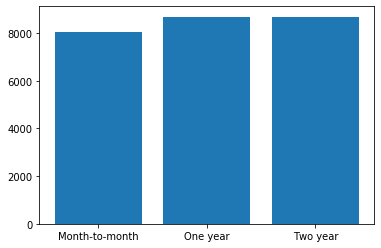

In [17]:
#Bar graph / Bivariate Analysis
plt.bar(df['Contract'],df['TotalCharges'])

We can observe that TotalCharges paid for contract in one year and two year is same but month to month has lowest paid value of about 8000.

# Label Encoding

We noticed before that some columns have object datatype, that needs to change to numeric (either int or float) datatype, so that our model can read the data.

In [18]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [19]:
#Checking Improved DataFrame
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


We can notice that all string values are converted to numeric values.



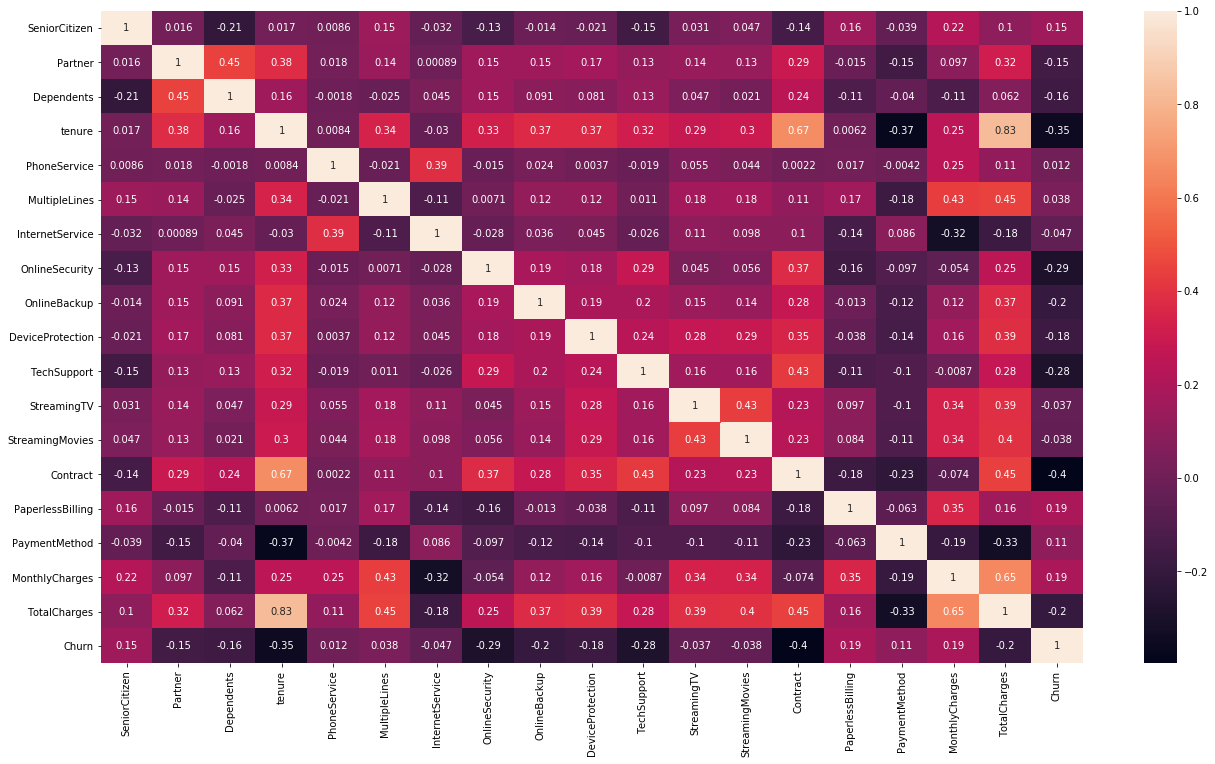

In [20]:
#Checking correlation / Multivariate Analysis
corr=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr,annot=True)
plt.show()

In [21]:
#Checking Correlation with respect to target column
corr['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198324
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

Churn has the best correlation with MonthlyCharges and lowest correlation with Contract. 

In [22]:
#Checking Statistical information
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


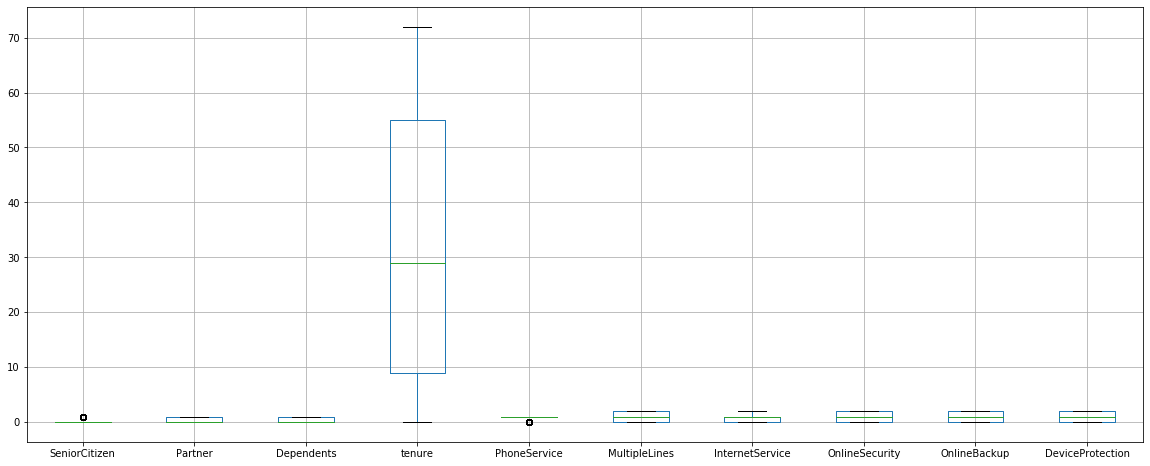

In [23]:
#Checking outliers with Boxplot Graph
df.iloc[:,0:10].boxplot(figsize=[20,8])

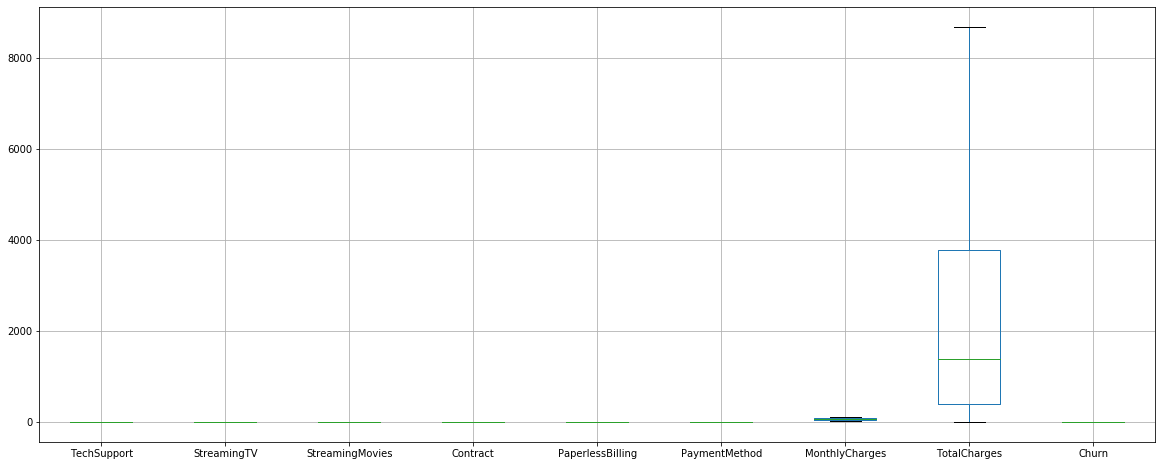

In [24]:
#Checking outliers with Boxplot Graph
df.iloc[:,10::].boxplot(figsize=[20,8])

Here there's no outliers that can effect our readings. so, we don't need to remove any outliers.

In [25]:
#X,Y Split
x=df.drop('Churn',axis=1)
y=df['Churn']

In [26]:
# Checking Skewness
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963235
dtype: float64

Some skew values are more than 0.5 and less than -0.5, so we need to improve skewness. 

In [27]:
#Improving Skewness
from sklearn.preprocessing import power_transform
pt=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(pt,columns=x.columns)
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.146121
dtype: float64

In [28]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
#Finding Best Random State
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=i, test_size=0.3)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        print('Best accuracy is', maxAcc,'on Random_state', maxRS)

Best accuracy is 0.8135352579271179 on Random_state 1
Best accuracy is 0.8182678655939423 on Random_state 3
Best accuracy is 0.8187411263606247 on Random_state 14
Best accuracy is 0.8215806909607194 on Random_state 20
Best accuracy is 0.824420255560814 on Random_state 24


Our model gives best accuracy of 82% on random state 24.

# Train Test Split

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=24, test_size=0.3)

# ML Alogrithms

In [31]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.824420255560814
[[1447  138]
 [ 233  295]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1585
           1       0.68      0.56      0.61       528

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.82      0.82      0.82      2113



In [32]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.735447231424515
[[1269  316]
 [ 243  285]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1585
           1       0.47      0.54      0.50       528

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.75      0.74      0.74      2113



In [33]:
#Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8088026502602934
[[1446  139]
 [ 265  263]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1585
           1       0.65      0.50      0.57       528

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.80      0.81      0.80      2113



In [34]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8168480832938949
[[1459  126]
 [ 261  267]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1585
           1       0.68      0.51      0.58       528

    accuracy                           0.82      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.81      0.82      0.81      2113



# Cross Validation Score

In [35]:
#Logistic Regression
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation Score :', scr1.mean())

Cross Validation Score : 0.8063326666236531


In [36]:
#Decision Tree Classifier
scr2=cross_val_score(dtc,x,y,cv=5)
print('Cross Validation Score :', scr2.mean())

Cross Validation Score : 0.7320719280276147


In [37]:
#Random Forest Classifier
scr3=cross_val_score(rfc,x,y,cv=5)
print('Cross Validation Score :', scr3.mean())

Cross Validation Score : 0.7907146227175946


In [38]:
#SVC
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross Validation Score :', scr4.mean())

Cross Validation Score : 0.7996610668430221


Difference between Accuracy Score and Cross Validation Score is minimum for Decision Tree Classifier model. So, we proceed with Decision Tree Classifier model only.

# Hyper Tuning Parameter

In [39]:
#Grid SearchCV
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['entropy','gini'], 'max_depth':np.arange(2,15)}
gcv=GridSearchCV(dtc,parameter,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_ 

{'criterion': 'entropy', 'max_depth': 5}

Best parameters are criterion-entropy with max_depth 5.

In [40]:
#Predicting values from Grid SearchCV
predgcv=gcv.best_estimator_.predict(x_test)
accuracy_score(y_test,predgcv)

0.8059630856601988

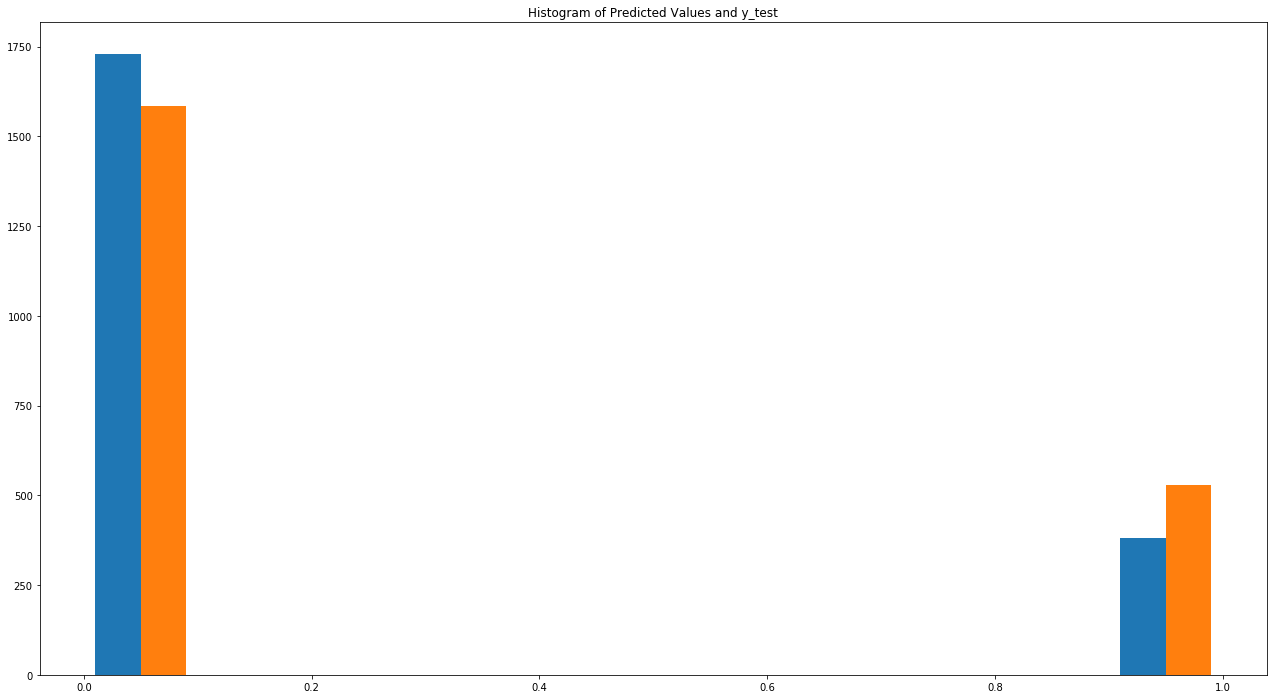

In [41]:
plt.figure(figsize=[22,12])
plt.hist([predgcv,y_test])
plt.title('Histogram of Predicted Values and y_test')
plt.show()

In [42]:
#Saving Model
import joblib

In [43]:
joblib.dump(gcv.best_estimator_,'Customer_Churn_Prediction.pk1')

['Customer_Churn_Prediction.pk1']

# Conclusion

In this project we observed that Decision Tree Classifier is the best fit model with accuracy score of 73% which gives accuracy score of 81% with best parameters that are criterion-entropy with max_depth 5.  We can notice in our graph, there are around 1700 permanent customer while around 350 churn customer.